# Deep Learning tutorial #2

# Carga de modelo entrenado con Keras

by [Pedro Fernando Rodenas Perez](https://pedrofrodenas.github.io) / [GitHub](https://github.com/PedrofRodenas)

### Introducción

En el [anterior tutorial](https://github.com/pedrofrodenas/Deep-Learning-Tutoriales/blob/master/1_MNIST_Keras.ipynb) hemos entrenado una red neuronal con Keras para clasificar la base de datos MNIST.  
En este tutorial aprenderemos como cargar un modelo y realizar clasificaciones con el sin tener que realizar todo el proceso de entreno.


### Importación de librerias

In [21]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from random import sample

### Descarga de la base de datos MNIST

Aunque el modelo este entrenado ya, no almacena el conjunto de datos de test o entreno, por tanto, es necesario descargarlos de nuevo.

In [2]:
# Para descargar la base de datos MNIST
import tensorflow as tf
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


### Guardar los datos de MNIST en diferentes variables


In [23]:
# Guardar las imagenes y etiquetas de entreno
images_train = mnist.train.images
labels_train = mnist.train.labels

# Guardar las imagenes y etiquetas de test
images_test = mnist.test.images
labels_test = mnist.test.labels

img_shape = (28, 28)

### Importación de modelo entrenado
El modelo entrenado en el [anterior tutorial](https://github.com/pedrofrodenas/Deep-Learning-Tutoriales/blob/master/1_MNIST_Keras.ipynb) ha sido nombrado _modelo.keras_ . Es necesario incluir la ruta completa al modelo para ser cargado correctamente.  
El modelo contiene almacenado la estructura de la red neuronal, el conjunto de matrices de pesos entrenadas. 
A continuacion se incluye la ruta al modelo y se carga.

Si no has entrenado la red neuronal del [tutorial anterior](https://github.com/pedrofrodenas/Deep-Learning-Tutoriales/blob/master/1_MNIST_Keras.ipynb) y guardado el modelo no es posible cargarlo en este tutorial.

In [8]:
path_model = 'modelo.h5'

new_model = load_model(path_model)

### Visualización de la estructura del modelo
Una vez cargado el modelo, no es necesario definir de nuevo toda la estructura de capas, ya está preparado para realizar clasificaciones.  
A continuación se muestra el sumario del modelo:

In [9]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               225920    
__________

### Predicción con el modelo cargado

In [13]:
y_pred2 = new_model.predict(x=images_test)

# Obtencion de las etiquetas predichas
cls_pred2 = np.argmax(y_pred2,axis=1)

### Comprobación de la precisión del modelo de manera manual

In [18]:
# Obtencion de las etiquetas verdaderas
true_labels2 = np.argmax(labels_test,axis=1)

# Obtencion vector booleano para ver que posiciones coinciden
possitions = cls_pred2 == true_labels2

# Numero de prediciones correctas dividido entre todas las prediciones
precision = sum(possitions)/len(true_labels2)

print("Precision : {0}%".format(precision))

Precision : 0.9771%


### Función auxiliar para plotear imagenes

La siguiente función sirve para plotear 9 ejemplos de la base de datos MNIST, y indicar que número se trata. En el caso que se le pase lo que ha predicho la red ploteará las imágenes predichas correctamente con un marco verde y las mal predichas con un rectángulo rojo.

In [82]:
def plot_imagenes(imagenes, verdaderas, predichas=None):
    
    # Seleccionar 9 indices aleatorios para elegir las imagenes
    ind = sample(range(len(imagenes)),9)
    
    # Tomar las imagenes
    img = imagenes[ind]
    
    color = 'green'
    
    # Tomar las etiquetas verdaderas y predichas si las hay
    if predichas is None:
        etiq = verdaderas[ind]
    else:
        etiq = verdaderas[ind]
        pred = predichas[ind]
         
    # Crear la figura con 3x3 sub-plots
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plotear imagen.
        ax.imshow(img[i].reshape(img_shape), cmap='binary')

        # Mostrar los numeros verdaderos y predichos
        if predichas is None:
            xlabel = "Numero: {0}".format(etiq[i])
        else:
            xlabel = "Numero: {0}, Predicho: {1}".format(etiq[i], pred[i])
            
            
            if etiq[i] != pred[i]:
                color = 'red'
            
            ax.spines['bottom'].set_color(color)
            ax.spines['top'].set_color(color)
            ax.spines['left'].set_color(color)
            ax.spines['right'].set_color(color)
            color = 'green'

        # Mostrar los numeros en el eje x
        ax.set_xlabel(xlabel)
        
        # Borrar los ticks del plot
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

### Mostrar algunos ejemplos predichos



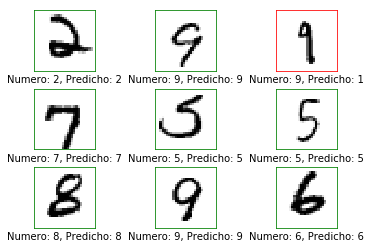

In [89]:
plot_imagenes(imagenes=images_test,
              verdaderas=true_labels2,
              predichas=cls_pred2)